## IMPORTING THE LIBRARIES

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
import datetime as dt

In [6]:
%autosave 100

Autosaving every 100 seconds


## INTRODUCTION TO DATASET

In [3]:
train=pd.read_csv('train.csv',infer_datetime_format=True,parse_dates=[2,3])
test=pd.read_csv('test.csv',infer_datetime_format=True,parse_dates=[2,3])

In [4]:
print(train.shape)
train.head()

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
print(test.shape)
test.head()

(625134, 9)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  object        
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 42.9+ MB
None


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [9]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### inference
1. NYC coodinates : 40.730610, -73.935242 There are huge outliers in the coordinates.
2. The trip duration range is 1sec to 3526282sec. Needless to say, any trip cannot last for a sec or apprx 980 hrs.

## DATA CLEANING

1. Corecting the coordinates range to work with .
     1.Range of latitude coordinates : 40.6 to 40.9 
     2.Range of longitude coordinates : -74.25 to -73.7

2. Altering the Trip duration range : 5min to 120 min

3. Empty trips are dropped - having 0 passengers

NOTE: For the coordinates, filtering id done using the same coordinates range on the train and test datset.

In [11]:
# coordinates

lat_min=40.6
lat_max=40.9
long_min=-74.25
long_max=-73.7

#Defining coordinates range
def lat_range(lati):
    return lati>=lat_min and lati<=lat_max
def long_range(longi):
    return longi>=long_min and longi<=long_max

In [12]:
train=train[(train['pickup_latitude'].apply(lat_range)) & (train['pickup_longitude'].apply(long_range))]
train=train[(train['dropoff_latitude'].apply(lat_range)) & (train['dropoff_longitude'].apply(long_range))]

test=test[(train['pickup_latitude'].apply(lat_range)) & (test['pickup_longitude'].apply(long_range))]
test=test[(test['dropoff_latitude'].apply(lat_range)) & (test['dropoff_longitude'].apply(long_range))]

<ipython-input-12-c33b21f0a31c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test=test[(train['pickup_latitude'].apply(lat_range)) & (test['pickup_longitude'].apply(long_range))]


In [13]:
# trip duration

train=train[(train.trip_duration>300)&(train.trip_duration<3600)]

In [14]:
#Checking the range

print('Latitude Range:{} to {}'.format(max(train.pickup_latitude.min(),train.dropoff_latitude.min()),max(train.pickup_latitude.max(),train.dropoff_latitude.max())))
print('Longitude Range:{} to {}'.format(max(train.pickup_longitude.min(),train.dropoff_longitude.min()),max(train.pickup_longitude.max(),train.dropoff_longitude.max())))
print('Trip duration in sec range:{} to {}'.format(train.trip_duration.min(),train.trip_duration.max()))
print('Datetime range:{} to {}'.format(train.pickup_datetime.min(),train.dropoff_datetime.max()))
print('Passenger range: {} to {}'.format(train.passenger_count.min(),train.passenger_count.max()))

Latitude Range:40.600677490234375 to 40.89995574951172
Longitude Range:-74.22979736328125 to -73.70030212402342
Trip duration in sec range:301 to 3599
Datetime range:2016-01-01 00:00:17 to 2016-07-01 00:48:20
Passenger range: 0 to 9


In [15]:
# dropping empty trips

train=train[train.passenger_count>0]

In [16]:
print('Passenger range: {} to {}'.format(train.passenger_count.min(),train.passenger_count.max()))
print(train.shape[0])

Passenger range: 1 to 9
1222114


## VIZUALIZATION

We will be using histogram to understand the distribution of the dataset.

Barplot to count the no of entries using different analysing methods.

Lineplot to compare.

Heatmap to extract insights using relative density.

In [ ]:
### PERFORMING ANALYSIS BASED ON HOUR, DAY, MONTH

In [17]:
#Naming week of a day and month of a year

dow_names=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mm_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [18]:
#Grouping month wise
train['mm_pickup']=train.pickup_datetime.dt.month.astype(np.int)
train['mm_dropoff']=train.dropoff_datetime.dt.month.astype(np.int)

test['mm_pickup']=test.pickup_datetime.dt.month.astype(np.int)

In [36]:
train['mm_pickup'].value_counts()

3    214354
4    211752
5    208955
2    198242
6    197885
1    190926
Name: mm_pickup, dtype: int64

In [37]:
train['mm_dropoff'].value_counts()

3    214296
4    211744
5    209018
2    198240
6    197819
1    190890
7       107
Name: mm_dropoff, dtype: int64

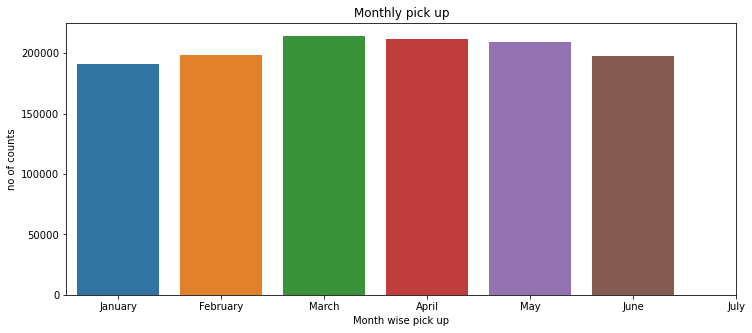

In [39]:
plt.figure(figsize=(12,5))
month_wise=train.groupby('mm_pickup').agg({'id':'count'}).reset_index()
sns.barplot(x='mm_pickup',y='id',data=month_wise)
plt.xlabel('Month wise pick up')
plt.ylabel('no of counts')
plt.xticks(range(0,7),mm_names[:7])
plt.title('Monthly pick up')
pass

### INFERENCE
1. couldn't infer more from this graph, as the trend of taxi trips cannot be predicted as we have limited amount of data.

In [19]:
#Grouping day wise
train['dow_pickup']=train.pickup_datetime.dt.weekday.astype(np.int)
train['dow_dropoff']=train.dropoff_datetime.dt.weekday.astype(np.int)

test['dow_pickup']=test.pickup_datetime.dt.weekday.astype(np.int)

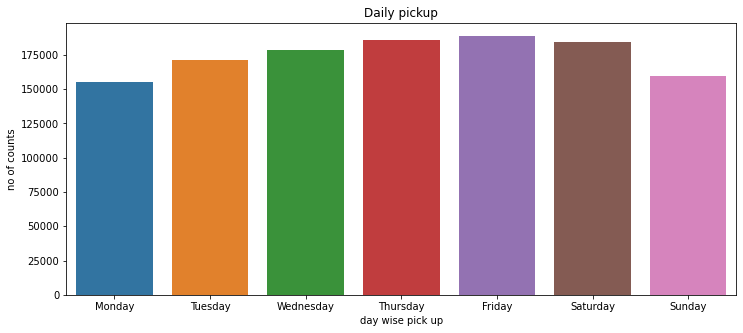

In [33]:
plt.figure(figsize=(12,5))
day_wise=train.groupby('dow_pickup').agg({'id':'count'}).reset_index()
sns.barplot(x='dow_pickup',y='id',data=day_wise)
plt.xlabel('day wise pick up')
plt.ylabel('no of counts')
plt.xticks(range(0,7),dow_names)
plt.title('Daily pickup')
plt.show()

### INFERENCE:
Maximum trips are observed during thursday, friday, saturday.

In [22]:
#Grouping day of year wise
train['yday']=train.pickup_datetime.dt.dayofyear.astype(np.int)
test['yday']=test.pickup_datetime.dt.dayofyear.astype(np.int)

In [21]:
#Grouping hour wise
train['hh_pickup']=train.pickup_datetime.dt.hour.astype(np.int)
train['hh_dropoff']=train.dropoff_datetime.dt.hour.astype(np.int)

test['hh_pickup']=test.pickup_datetime.dt.hour.astype(np.int)

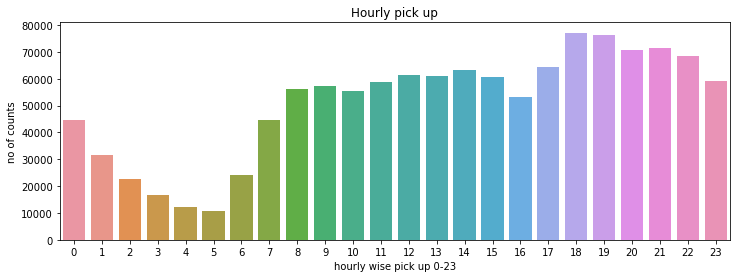

In [30]:
plt.figure(figsize=(12,4))
hour_wise=train.groupby('hh_pickup').agg({'id':'count'}).reset_index()
sns.barplot(x='hh_pickup',y='id',data=hour_wise)
plt.xlabel('hourly wise pick up 0-23')
plt.ylabel('no of counts')
plt.title('Hourly pick up')
plt.show()

### INFERENCE
1. In the early morning time, less traffic. 
2. Max rush was at 6 to 7pm followed by 8 to 10pm.

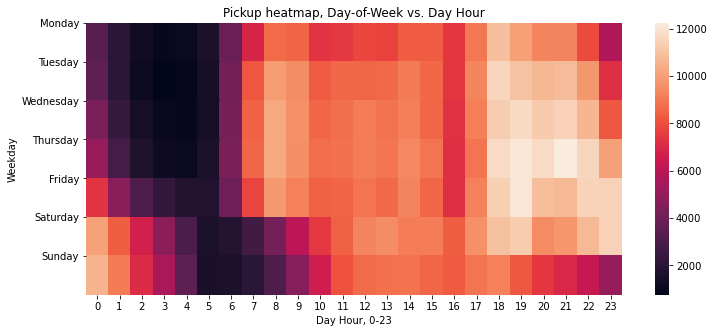

In [43]:
#heatmap hour vs day wise

plt.figure(figsize=(12,5))
plot1=pd.crosstab(train.dow_pickup,train.hh_pickup)
sns.heatmap(plot1)
plt.title('Pickup heatmap, Day-of-Week vs. Day Hour')
plt.ylabel('Weekday')
plt.xlabel('Day Hour, 0-23')
plt.yticks(range(0,7),dow_names,rotation='horizontal') 
plt.show()

### INFERENCE
From the heatmap:
    1. it can be seen that max rush noticed on week days at time around 6 pm to 9 pm.
    2. less no.of trips during the early mornings.


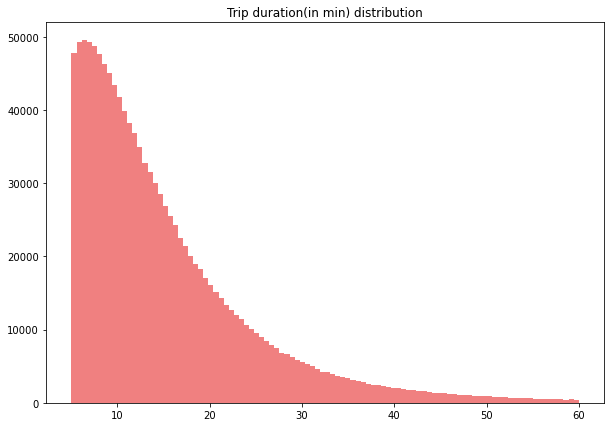

In [45]:
# Trip Duration Analysis

plt.figure(figsize=(10,7))
plt.hist(train.trip_duration/60,bins=100,color='lightcoral')
plt.title('Trip duration(in min) distribution')
plt.show()

### INFERENCE

1. Most of the trips last for less than 10-20 minutes and barely few could cross a span of 50-60 min.

People travel shorter distances in short time duration